In [1]:
# !pip install opencv-python

In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf
import keras
from tensorflow.keras.utils import plot_model

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM
from keras.layers import (Input, Dense, Dropout, Activation, Flatten, Convolution2D, 
                          MaxPooling2D, UpSampling2D, Conv2DTranspose, concatenate)
from keras.layers.convolutional import Conv2D
from keras.models import Sequential, Model, model_from_json, load_model
from keras.regularizers import l2
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam


import keras.backend as K

In [3]:
def dice_coef(y_true, y_pred):
    return (2. * K.sum(y_true * y_pred) + 1.) / (K.sum(y_true) + K.sum(y_pred) + 1.)

def Unet(num_classes = 14, input_shape= (256, 256, 3)):
    img_input = Input(input_shape)

    x = Conv2D(64, (3, 3), padding='same', name='block1_conv1')(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv2')(x)
    x = BatchNormalization()(x)
    block_1_out = Activation('relu')(x)
    x = MaxPooling2D()(block_1_out)

    x = Conv2D(128, (3, 3), padding='same', name='block2_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same', name='block2_conv2')(x)
    x = BatchNormalization()(x)
    block_2_out = Activation('relu')(x)
    x = MaxPooling2D()(block_2_out)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv3')(x)
    x = BatchNormalization()(x)
    block_3_out = Activation('relu')(x)
    x = MaxPooling2D()(block_3_out)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv3')(x)
    x = BatchNormalization()(x)
    block_4_out = Activation('relu')(x)

    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = concatenate([x, block_3_out])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = concatenate([x, block_2_out])
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = concatenate([x, block_1_out])
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(num_classes, (3, 3), activation='softmax', padding='same')(x)

    model = Model(img_input, x)
    return model

In [5]:
path_train = 'trainsss/'
img1 = cv2.imread(path_train, 0)

file_train_list = os.listdir(path_train)
img0 = cv2.imread(path_train + file_train_list[0])
plt.imshow(img0)
print(np.shape(img0))
print(len(file_train_list))

IndexError: list index out of range

In [4]:
szy, szx, _ = np.shape(img0)
N_ex = 500
N_bias = 0
x_train = np.zeros((N_ex, szy, int(szx/2),3))
y_train = np.zeros((N_ex, szy, int(szx/2),3))
k = 0;

for f in file_train_list[N_bias:N_bias + N_ex]:
    x_train[k] = cv2.imread(path_train + f)[:,:256]/256
    y_train[k] = cv2.imread(path_train + f)[:,256:]/256
    k = k + 1

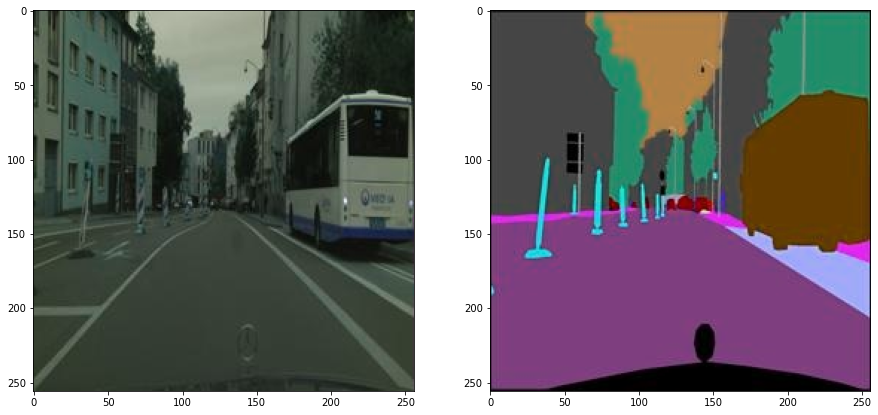

In [5]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(x_train[0])
plt.subplot(1,2,2)
plt.imshow(y_train[0])
plt.show()

(256, 512, 3)
500


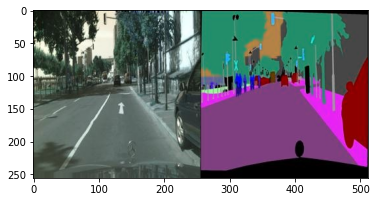

In [6]:
path_val = 'cityscapes_data/val/'
img1 = cv2.imread(path_val, 0)

file_val_list = os.listdir(path_val)
img0 = cv2.imread(path_val + file_val_list[0])
N_val = 50

plt.imshow(img0)
print(np.shape(img0))
print(len(file_val_list))

In [7]:
szy, szx, _ = np.shape(img0)
x_val = np.zeros((N_val, szy, int(szx/2),3))
y_val = np.zeros((N_val, szy, int(szx/2),3))
k = 0;

for f in file_val_list[0:N_val]:
    x_val[k] = cv2.imread(path_val + f)[:,:256] / 256
    y_val[k] = cv2.imread(path_val + f)[:,256:] / 256
    k = k + 1

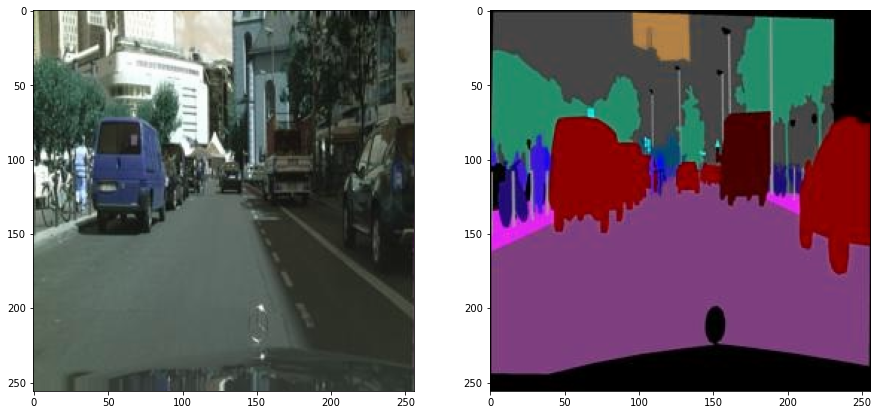

In [8]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(x_val[1])
plt.subplot(1,2,2)
plt.imshow(y_val[1])
plt.show()

2022-06-10 09:47:53.320741: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


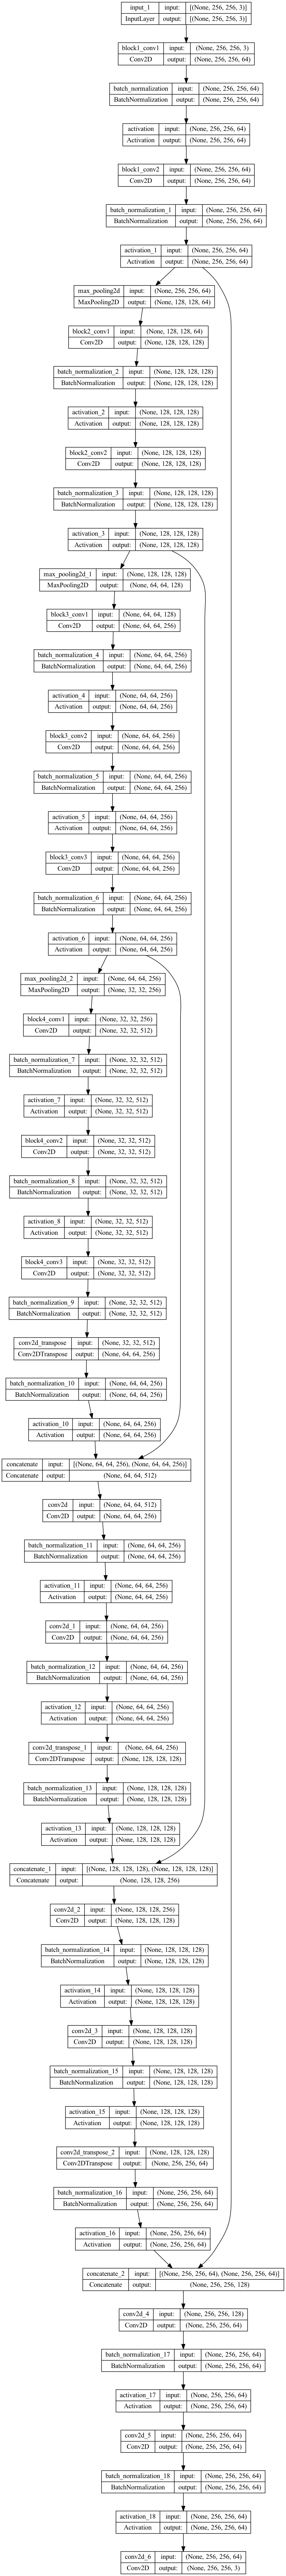

In [9]:
modelC = Unet(3, (256, 256, 3))

plot_model(modelC, to_file='modelC.png', show_shapes=True)

In [10]:
modelC.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=[dice_coef])
modelC.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['block1_conv1[0][0]']           
 alization)                     )                                                             

In [11]:
history = modelC.fit(x_train, y_train,
                     epochs=20,
                     batch_size=10,
                     validation_data=(x_val, y_val)
                     )

Epoch 1/25
50/50 [==============================] - 780s 15s/step - loss: 1.1703 - dice_coef: 0.3599 - val_loss: 2.1829 - val_dice_coef: 0.3243
Epoch 2/25
50/50 [==============================] - 759s 15s/step - loss: 1.1505 - dice_coef: 0.3601 - val_loss: 1.2952 - val_dice_coef: 0.3492
Epoch 3/25
50/50 [==============================] - 788s 16s/step - loss: 1.1517 - dice_coef: 0.3608 - val_loss: 1.3138 - val_dice_coef: 0.3575
Epoch 4/25
50/50 [==============================] - 850s 17s/step - loss: 1.1506 - dice_coef: 0.3605 - val_loss: 1.2524 - val_dice_coef: 0.3515
Epoch 5/25
50/50 [==============================] - 830s 17s/step - loss: 1.1550 - dice_coef: 0.3618 - val_loss: 1.2001 - val_dice_coef: 0.3530
Epoch 6/25
50/50 [==============================] - 790s 16s/step - loss: 1.1575 - dice_coef: 0.3619 - val_loss: 1.2100 - val_dice_coef: 0.3460
Epoch 7/25
50/50 [==============================] - 829s 17s/step - loss: 1.1606 - dice_coef: 0.3625 - val_loss: 1.1952 - val_dice_coef:

In [12]:
pred = modelC.predict(x_val)

2/2 [==============================] - 19s 7s/step


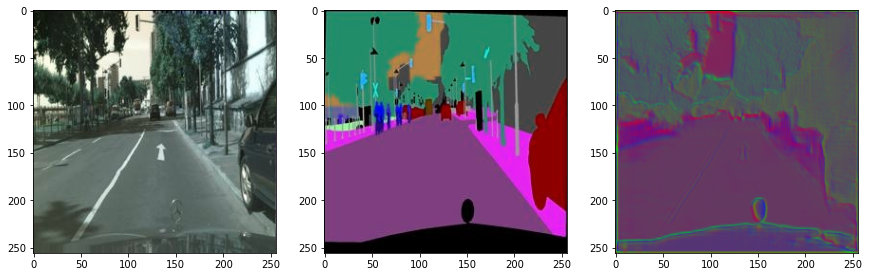

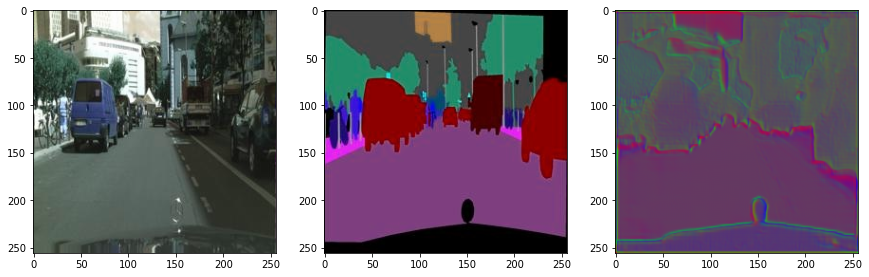

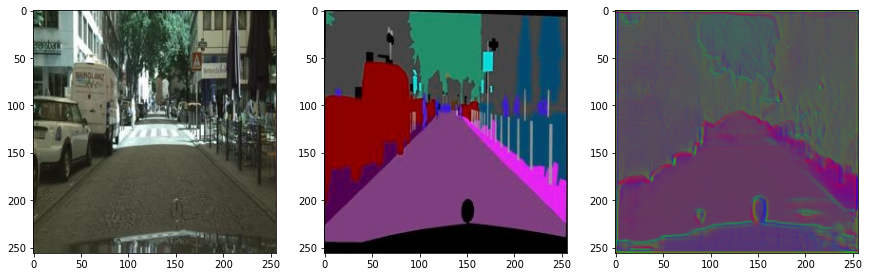

In [13]:
n = 3
for k in range(n):
    plt.figure(figsize=(20, 60))

    plt.subplot(n, 4, 1 + k*4)
    plt.imshow(x_val[k])

    plt.subplot(n, 4, 2 + k*4)
    plt.imshow(y_val[k])

    plt.subplot(n, 4, 3 + k*4)
    plt.imshow(pred[k])

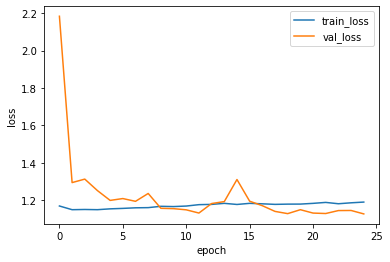

In [14]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

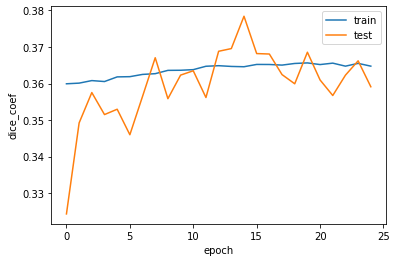

In [15]:
plt.plot(history.history['dice_coef'], label='train')
plt.plot(history.history['val_dice_coef'], label='test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('dice_coef')
plt.show()

Факторы, влияющие на точность:

- число эпох
- количество классов
- размер пакета